In [5]:
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [6]:
dataset_name = 'dry_bean'
shapes = {
    'S': (14,12,9),
    'V2': (8,),
    'V3': (6,),
    'V4': (5,),
    'V5': (4,)
}
epochs = 50
num_tries = 6

random_seed = 42
random_seeds = random.sample(range(0, 4294967295), num_tries)
curr_try = -1

def datasets_generator_fun():
    global curr_try
    global random_seeds
    global dataset_name
    curr_try += 1
    curr_try = curr_try % num_tries
    return get_validation_datasets(dataset_name, random_seed=random_seeds[curr_try], feature_range=(0,1), test_ratio=0)
    
    
dataset_shapes = get_dataset_shapes(dataset_name)
print(dataset_shapes)

([16], [7])


### S(X,X,X)

Average elapsed k-fold validation time: 680.26126 sec
Last measures: [0.1432666927576065, 0.14285723865032196, 0.14285728335380554, 0.14285723865032196, 0.012554937973618507, 0.14238053560256958, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14070862531661987, 0.14284461736679077, 0.13497649133205414, 0.143119677901268, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14285755157470703, 0.1301226168870926, 0.14285723865032196, 0.14292170107364655, 0.1417451947927475, 0.14285723865032196, 0.1447574347257614, 0.14285723865032196, 0.13970515131950378, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196]
Loss history average: [0.14052456 0.14034767 0.1395432  0.13903112 0.13917758 0.13857532
 0.13798634 0.13785645 0.13789035 0.13795985 0.13792343 0.13787768
 0.13784427 0.13783022 0.13783595 0.13784228 0.13779617 0.1377224
 0.13763167 0.13746817 0.13736411 0.13730385 0.13724144 0.13739239
 0.1370034  0.13

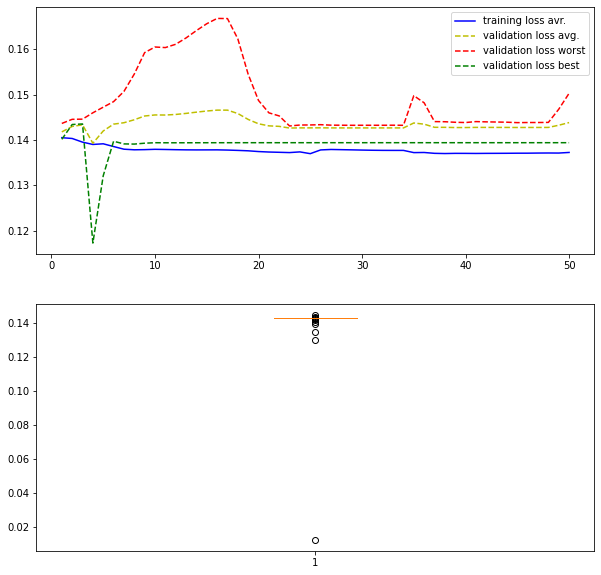

In [7]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=shapes['S'], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(2)

Average elapsed k-fold validation time: 587.16796 sec
Last measures: [0.14335912466049194, 0.14286744594573975, 0.14285723865032196, 0.14339688420295715, 0.14318795502185822, 0.14109359681606293, 0.14039364457130432, 0.14339430630207062, 0.1297660917043686, 0.14285723865032196, 0.14159353077411652, 0.14045998454093933, 0.14287447929382324, 0.1297660768032074, 0.14285723865032196, 0.14337508380413055, 0.1428672820329666, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14344672858715057, 0.14331062138080597, 0.14287105202674866, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.1428673267364502, 0.1428595781326294, 0.14421653747558594, 0.14353369176387787]
Loss history average: [0.14110114 0.14058542 0.14033777 0.14016185 0.13985401 0.13926119
 0.13842289 0.13755483 0.13681425 0.13625965 0.13589956 0.13566945
 0.13554161 0.13547109 0.13543136 0.13540405 0.1353841  0.13536365
 0.13533723 0.13529404 0.13522428 0.13513953 0.13504259 0.13494297
 0.13485943 0.1

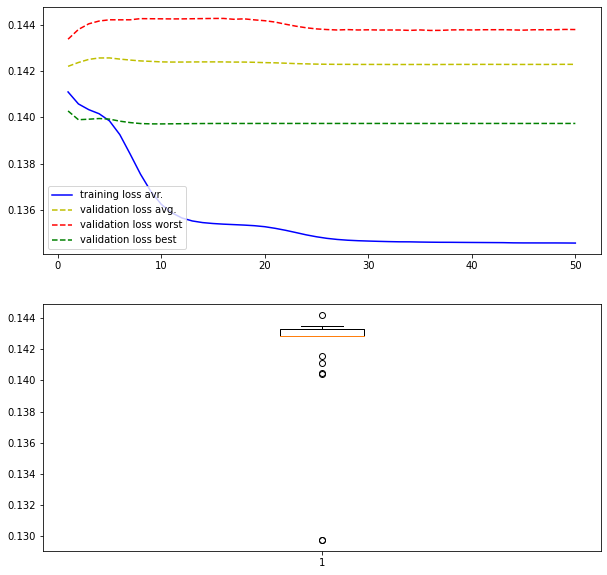

In [8]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(2)

Average elapsed k-fold validation time: 427.51120 sec
Last measures: [0.14036248624324799, 0.14285723865032196, 0.14285723865032196, 0.143541619181633, 0.14285723865032196, 0.141092911362648, 0.14285723865032196, 0.14286042749881744, 0.14285723865032196, 0.14390645921230316, 0.13915538787841797, 0.14138533174991608, 0.15656106173992157, 0.1440933346748352, 0.10247214883565903, 0.1407191902399063, 0.14285723865032196, 0.1428600698709488, 0.12361160665750504, 0.14285723865032196, 0.14285723865032196, 0.14285792410373688, 0.14286558330059052, 0.14285723865032196, 0.14316290616989136, 0.14254622161388397, 0.1428573727607727, 0.14286601543426514, 0.14285723865032196, 0.1433819681406021]
Loss history average: [0.14038312 0.13928462 0.13917162 0.13901347 0.13922858 0.1386963
 0.13771236 0.13606448 0.13480065 0.13355527 0.13249079 0.13202831
 0.13147139 0.13101879 0.1307337  0.13035323 0.12997149 0.12992382
 0.12960849 0.12933127 0.12905872 0.12880254 0.12854749 0.12828396
 0.12809767 0.127884

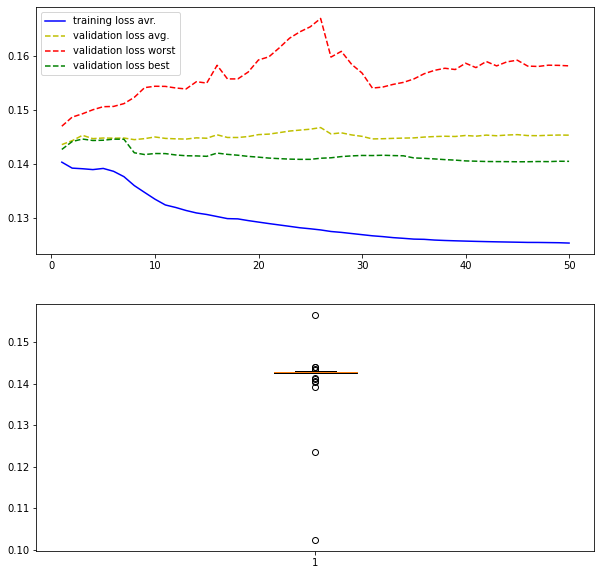

In [9]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V2'], inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(3)

Average elapsed k-fold validation time: 727.41445 sec
Last measures: [0.141092911362648, 0.14331752061843872, 0.14285723865032196, 0.14469307661056519, 0.14376258850097656, 0.14677757024765015, 0.14048223197460175, 0.1428750902414322, 0.1431480348110199, 0.14285723865032196, 0.14017073810100555, 0.14048223197460175, 0.14465253055095673, 0.14325787127017975, 0.1441182941198349, 0.14285723865032196, 0.14464475214481354, 0.1428765058517456, 0.14285723865032196, 0.1431875377893448, 0.14085198938846588, 0.142862007021904, 0.14285723865032196, 0.14285723865032196, 0.144021674990654, 0.14109359681606293, 0.14289334416389465, 0.14285723865032196, 0.14342597126960754, 0.14285723865032196]
Loss history average: [0.14088107 0.14033512 0.14010006 0.13984292 0.13942437 0.13840213
 0.13717407 0.13601679 0.13519974 0.13470493 0.13441859 0.13427843
 0.13416799 0.13409961 0.13404561 0.13398814 0.13392392 0.133845
 0.13377748 0.13372657 0.13369475 0.13367442 0.13365624 0.13363914
 0.13362672 0.13361007 

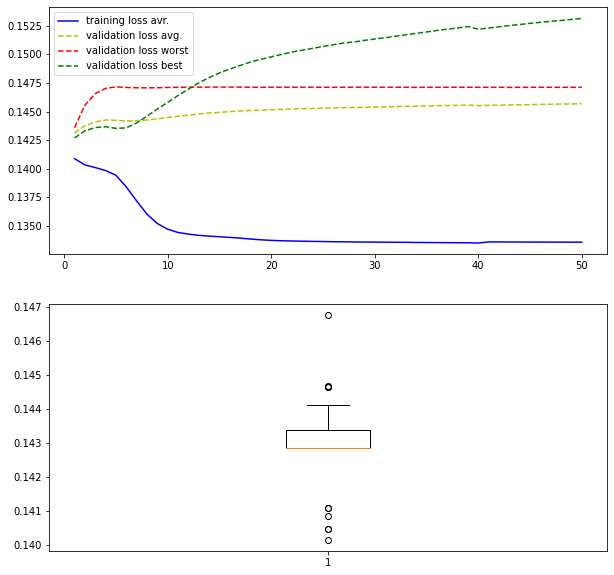

In [10]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(3)

Average elapsed k-fold validation time: 576.84602 sec
Last measures: [0.1429176926612854, 0.14285723865032196, 0.13489554822444916, 0.14312021434307098, 0.14285723865032196, 0.14290404319763184, 0.14369750022888184, 0.14326098561286926, 0.14358727633953094, 0.14388588070869446, 0.14222030341625214, 0.14285854995250702, 0.14285723865032196, 0.1257086545228958, 0.04006623104214668, 0.14109359681606293, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.11235750466585159, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14301899075508118, 0.14327742159366608, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.019637420773506165]
Loss history average: [0.1409752  0.14015619 0.13995362 0.13935923 0.13886152 0.13801839
 0.13626351 0.13597434 0.13533555 0.13459698 0.13385803 0.13330904
 0.13287581 0.13264105 0.1322419  0.1317321  0.13131153 0.13096718
 0.13067528 0.13032913 0.12995803 0.12976588 0.12924641 0.1289701
 0.12864961 

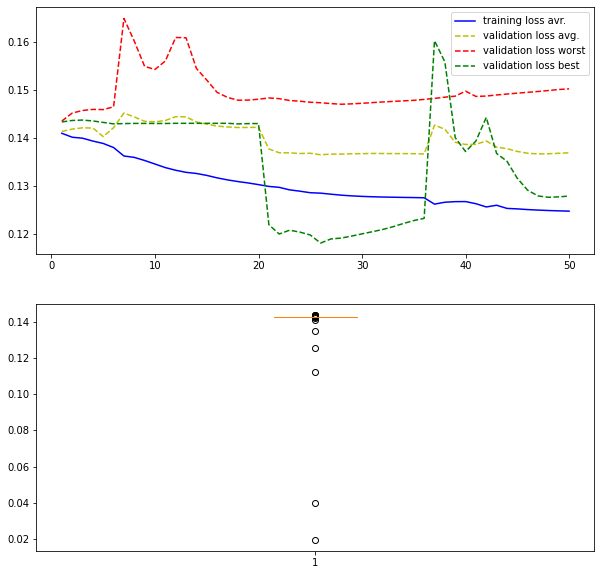

In [11]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V3'], inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(4)

Average elapsed k-fold validation time: 1409.55120 sec
Last measures: [0.14285723865032196, 0.14325930178165436, 0.14285723865032196, 0.14330416917800903, 0.14305561780929565, 0.14285723865032196, 0.14271855354309082, 0.14374284446239471, 0.14285723865032196, 0.1433725357055664, 0.14285723865032196, 0.1431652307510376, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14237923920154572, 0.14330069720745087, 0.14416180551052094, 0.14317291975021362, 0.1436471939086914, 0.14395245909690857, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14327900111675262, 0.14285723865032196, 0.14289386570453644, 0.14285723865032196, 0.14339236915111542, 0.14285723865032196]
Loss history average: [0.14151912 0.14120097 0.14108467 0.1406961  0.14027064 0.13957655
 0.13890044 0.13838522 0.13801553 0.13773242 0.13746989 0.13725086
 0.13709398 0.13700644 0.13696096 0.13690274 0.1369663  0.13695046
 0.13693769 0.13692347 0.13691227 0.13690476 0.13689715 0.1368905
 0.13688734 0

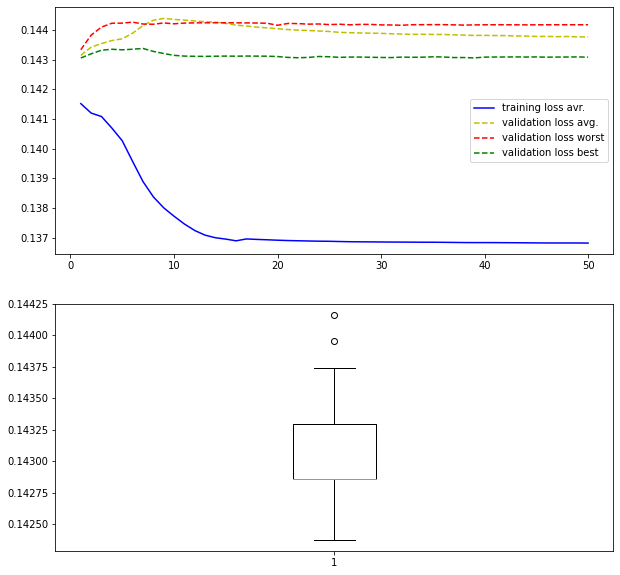

In [12]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(4)

Average elapsed k-fold validation time: 744.66151 sec
Last measures: [0.14109359681606293, 0.144134521484375, 0.14285723865032196, 0.14343120157718658, 0.14331158995628357, 0.14285723865032196, 0.13933254778385162, 0.14687012135982513, 0.1432829201221466, 0.14321990311145782, 0.14107385277748108, 0.13867135345935822, 0.14291082322597504, 0.14380618929862976, 0.14285723865032196, 0.1431562900543213, 0.1433684378862381, 0.14285723865032196, 0.14285723865032196, 0.15002185106277466, 0.14091219007968903, 0.14364881813526154, 0.142858624458313, 0.14285723865032196, 0.14411452412605286, 0.14285723865032196, 0.14117023348808289, 0.14335036277770996, 0.14321225881576538, 0.14285723865032196]
Loss history average: [0.13987491 0.13906514 0.13848554 0.1384281  0.13780481 0.13712627
 0.13579749 0.1346433  0.13362919 0.13318377 0.13141461 0.13146732
 0.13124571 0.1311421  0.13097043 0.13082403 0.13069985 0.13059376
 0.12910865 0.12898508 0.12867166 0.12843906 0.12803505 0.12782119
 0.12703402 0.126

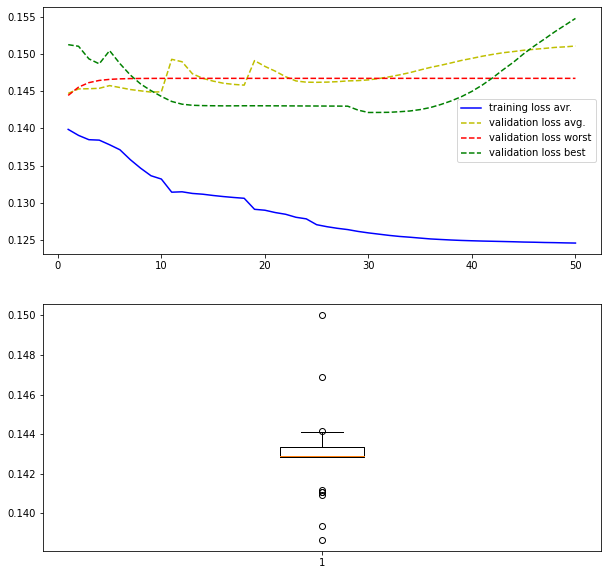

In [13]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V4'], inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):U(5)

Average elapsed k-fold validation time: 608.55844 sec
Last measures: [0.14109313488006592, 0.14291206002235413, 0.14286717772483826, 0.14319676160812378, 0.14335915446281433, 0.14106200635433197, 0.14048223197460175, 0.14400219917297363, 0.14474403858184814, 0.14285723865032196, 0.1410921961069107, 0.14444725215435028, 0.14285723865032196, 0.14373500645160675, 0.14285723865032196, 0.14333146810531616, 0.1430610567331314, 0.14304769039154053, 0.1428733617067337, 0.14285723865032196, 0.14285723865032196, 0.14300291240215302, 0.14285723865032196, 0.14500142633914948, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196]
Loss history average: [0.14175979 0.14126111 0.1409022  0.14082736 0.14052218 0.14004126
 0.13939847 0.1388058  0.13835774 0.13804649 0.13804825 0.13794283
 0.13787304 0.13782211 0.13778447 0.13775388 0.13772787 0.1377096
 0.13767843 0.13759615 0.13749236 0.13731812 0.13720354 0.13708858
 0.13702719 0.

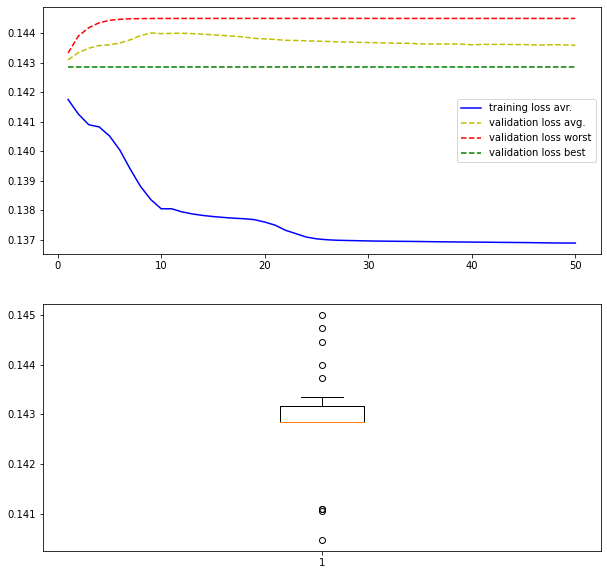

In [14]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V5'], inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)

### V1(X):S(5)

Average elapsed k-fold validation time: 565.20141 sec
Last measures: [0.14285723865032196, 0.14338143169879913, 0.14331650733947754, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14285723865032196, 0.14350071549415588, 0.14285723865032196, 0.14288797974586487, 0.1422318071126938, 0.14285987615585327, 0.14591342210769653, 0.14285723865032196, 0.14109313488006592, 0.14285723865032196, 0.14285723865032196, 0.143124520778656, 0.05667109787464142, 0.14600296318531036, 0.14340297877788544, 0.14285723865032196, 0.14285723865032196, 0.1434832513332367, 0.14351284503936768, 0.14339444041252136, 0.14334967732429504, 0.12157414853572845, 0.14285723865032196]
Loss history average: [0.14135578 0.14052298 0.13917977 0.13934528 0.13912051 0.13874522
 0.13863623 0.13829855 0.13822185 0.13795892 0.13784647 0.13771231
 0.13754255 0.13733007 0.1369928  0.13678176 0.13662202 0.13647874
 0.13635533 0.13625348 0.13618258 0.13611974 0.13607829 0.136035
 0.13600211 0.13

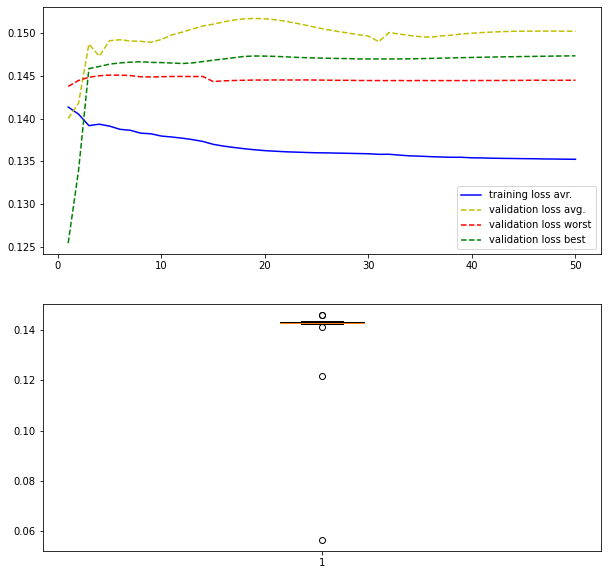

In [15]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=shapes['V5'], inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="shared", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

validate_model_multiple(model_fun, datasets_generator_fun, epochs=epochs, num_tries=num_tries, \
    loss_name="mean_squared_error", measure_name="val_mean_squared_error", 
    print_data=True)